In [1]:
#importing lib and packages

import pandas as pd
pd.options.display.max_rows = 1000 # for showing truncated result

import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np

In [2]:
data = pd.read_csv ('Tinder.csv', encoding='ISO-8859-1')
# using encoder to read data properly without error
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Basic EDA and statistical analysis
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6837 entries, 0 to 6836
Data columns (total 195 columns):
 #    Column    Dtype  
---   ------    -----  
 0    iid       int64  
 1    id        int64  
 2    gender    int64  
 3    idg       int64  
 4    condtn    int64  
 5    wave      int64  
 6    round     int64  
 7    position  int64  
 8    positin1  float64
 9    order     int64  
 10   partner   int64  
 11   pid       float64
 12   match     int64  
 13   int_corr  float64
 14   samerace  int64  
 15   age_o     float64
 16   race_o    float64
 17   pf_o_att  float64
 18   pf_o_sin  float64
 19   pf_o_int  float64
 20   pf_o_fun  float64
 21   pf_o_amb  float64
 22   pf_o_sha  float64
 23   dec_o     int64  
 24   attr_o    float64
 25   sinc_o    float64
 26   intel_o   float64
 27   fun_o     float64
 28   amb_o     float64
 29   shar_o    float64
 30   like_o    float64
 31   prob_o    float64
 32   met_o     float64
 33   age       float64
 34   field     object 
 35 

In [4]:
#counting null values
data.isnull().sum()

iid            0
id             0
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o         82
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     107
dec_o          0
attr_o       141
sinc_o       210
intel_o      234
fun_o        282
amb_o        584
shar_o       925
like_o       166
prob_o       221
met_o        285
age           73
field         63
field_cd      83
undergra    3465
mn_sat      4547
tuition     4272
race          64
imprace       80
imprelig      80
from          80
zipcode      897
income      3267
goal          80
date          98
go_out        80
career        90
career_c     139
sports        80
tvsports      80
exercise      80
dining        80
museums       80
art           80
hiking        80
gaming        80
clubbing      

In [5]:
#observing the shape of data
data.shape

(6837, 195)

Text(0, 0.5, 'Frequency')

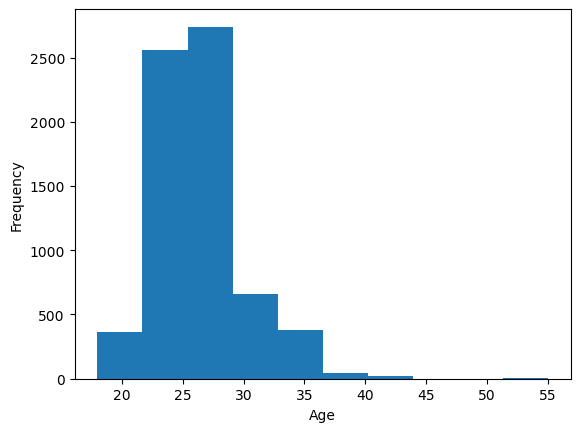

In [6]:
# age distribution of participants
age = data[np.isfinite(data['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [7]:
# lets see how many persons got a match
pd.crosstab(index=data['match'], columns='counts')

col_0,counts
match,
0,5688
1,1149


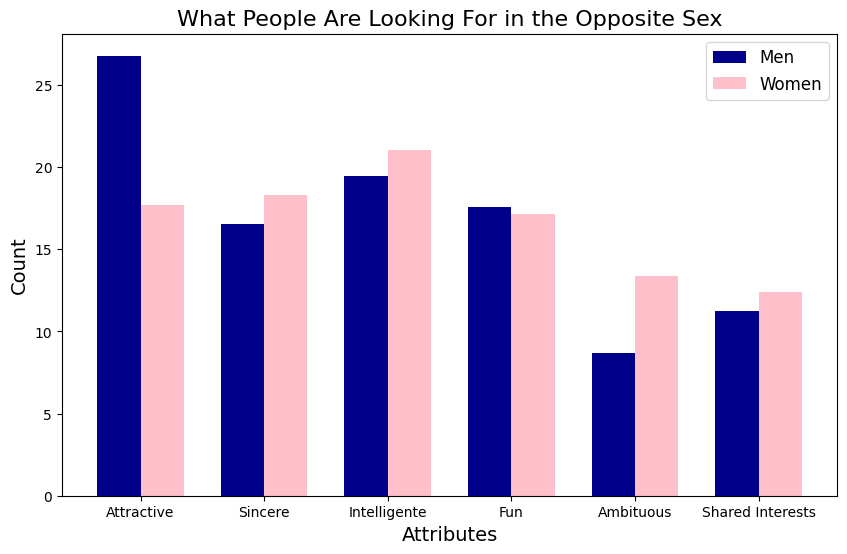

In [8]:
######### First question:
# -What are the least desirable attributes in a male partner? Does this differ for female partners?
# graph representing the answer to the question: 
#     What do you look for in a date?

atributes_gender = data[['gender','attr1_1', 'sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']].groupby('gender').mean()
cols = ['Attractive','Sincere','Intelligente','Fun','Ambituous','Shared Interests']
atributes_gender.columns = cols

# Extracting data for Men and Women
men_data = atributes_gender.iloc[1].tolist()
women_data = atributes_gender.iloc[0].tolist()
categories = atributes_gender.columns.values

# Creating bar plots using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
bar_positions_men = np.arange(len(categories))
bar_positions_women = bar_positions_men + bar_width

# Plotting Men data
ax.bar(bar_positions_men, men_data, width=bar_width, label='Men', color='darkblue')

# Plotting Women data
ax.bar(bar_positions_women, women_data, width=bar_width, label='Women', color='pink')

# Adding labels and title
ax.set_title('What People Are Looking For in the Opposite Sex', fontsize=16)
ax.set_xlabel('Attributes', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_xticks(bar_positions_men + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend(fontsize=12)
plt.show()


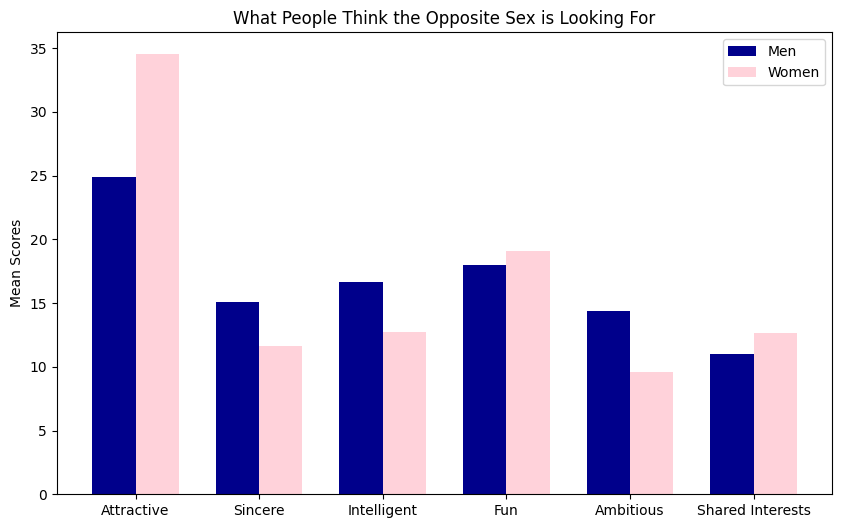

In [9]:
######### Second question:
# -How important do people think attractiveness is in potential mate selection vs. its real impact?
# graph representing the answer to the question: 
#     What do you think the opposite sex looks for in a date?

atributes_gender_2 = data[['gender','attr2_1', 'sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']].groupby('gender').mean()
atributes_gender_2.columns = cols

# Group by gender and calculate mean
atributes_gender_2 = data[['gender', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']].groupby('gender').mean()

# Rename columns for better readability
cols = ['Attractive', 'Sincere', 'Intelligent', 'Fun', 'Ambitious', 'Shared Interests']
atributes_gender_2.columns = cols

# Plotting using matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

# Define bar width
bar_width = 0.35

# Set the positions for the bars
bar_positions_men = np.arange(len(cols))
bar_positions_women = bar_positions_men + bar_width

# Plot bars for Men
ax.bar(bar_positions_men, atributes_gender_2.loc[1], width=bar_width, color='darkblue', label='Men')

# Plot bars for Women
ax.bar(bar_positions_women, atributes_gender_2.loc[0], width=bar_width, color='pink', label='Women', alpha=0.7)

# Set labels and title
ax.set_ylabel('Mean Scores')
ax.set_title('What People Think the Opposite Sex is Looking For')
ax.set_xticks(bar_positions_men + bar_width / 2)
ax.set_xticklabels(cols)
ax.legend()

# Show the plot
plt.show()

Average Ratings for Shared Interests and Shared Racial Background:
       shar1_1   imprace  imprelig
dec                               
0.0  11.618752  4.063402  3.945619
1.0  12.076913  3.482447  3.520334


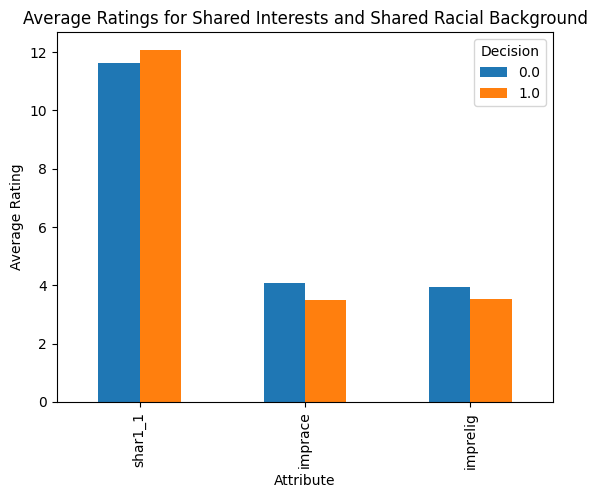

In [18]:
######### third question:
# -Are shared interests more important than a shared racial background?
# graph representing the importance of race and shared interest in relation with the decision

# Columns for shared interests and shared racial background
interests_and_race_columns = ['shar1_1', 'imprace','imprelig', 'dec']

# Filter relevant columns
interests_and_race_data = data[interests_and_race_columns]

# Calculate average ratings for shared interests and shared racial background
average_ratings_interests_race = interests_and_race_data.groupby('dec')[['shar1_1', 'imprace', 'imprelig']].mean()

# Display results for average ratings
print("Average Ratings for Shared Interests and Shared Racial Background:")
print(average_ratings_interests_race)

# Visualize the results for average ratings
average_ratings_interests_race.transpose().plot(kind='bar', title='Average Ratings for Shared Interests and Shared Racial Background')
plt.xlabel('Attribute')
plt.ylabel('Average Rating')
plt.legend(title='Decision')
plt.show()




Self-Perceived Attractiveness vs. Average Decision Rate
      attr2_1  dec
0        35.0  1.0
1        35.0  1.0
2        35.0  1.0
3        35.0  1.0
4        35.0  1.0
...       ...  ...
6832     50.0  1.0
6833     50.0  0.0
6834     50.0  0.0
6835     50.0  0.0
6836      NaN  NaN

[6837 rows x 2 columns]


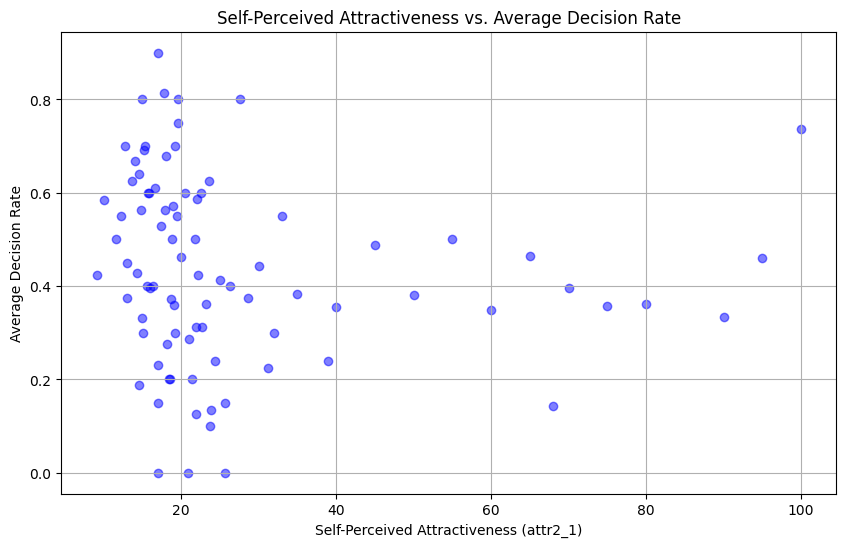

In [11]:
######### fourth question:
# -Can people accurately predict their own perceived value in the dating market?
# graph representing the self-perceived in relation with the average decision rate

# Filter relevant columns
data_subset = data[['attr2_1', 'dec']]

print("Self-Perceived Attractiveness vs. Average Decision Rate")
print(data_subset)

# Group by self-perceived attractiveness and calculate the average decision rate
avg_dec_by_attr = data_subset.groupby('attr2_1')['dec'].mean()

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_dec_by_attr.index, avg_dec_by_attr.values, color='blue', alpha=0.5)
plt.title('Self-Perceived Attractiveness vs. Average Decision Rate')
plt.xlabel('Self-Perceived Attractiveness (attr2_1)')
plt.ylabel('Average Decision Rate')
plt.grid(True)
plt.show()



Match Rate by Order Position:
order
1     0.233624
2     0.168122
3     0.170306
4     0.196937
5     0.188184
6     0.167785
7     0.158986
8     0.163594
9     0.189252
10    0.180000
11    0.151007
12    0.114094
13    0.144295
14    0.134228
15    0.130769
16    0.134615
17    0.129187
18    0.172249
19    0.231343
20    0.140000
21    0.095238
Name: match, dtype: float64


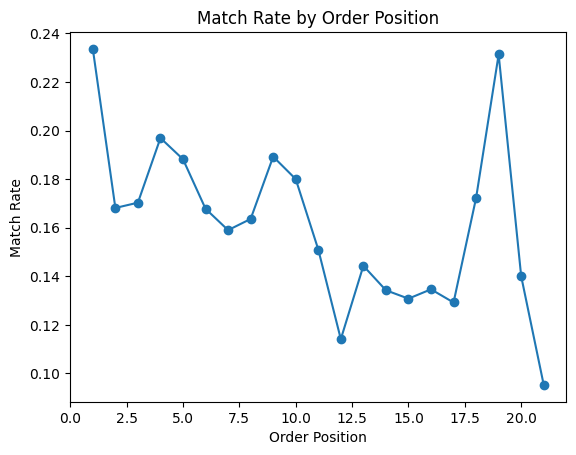

In [12]:
######### fifth question:
# -In terms of getting a second date, is it better to be someone's first speed date of the night or their last?
# graph representing the order position in relation with the match rate

# Columns for analysis
order_match_columns = ['order', 'match']

# Filter relevant columns
order_match_data = data[order_match_columns]

# Calculate the match rate for each order position
match_rate_by_order = order_match_data.groupby('order')['match'].mean()

# Display results
print("Match Rate by Order Position:")
print(match_rate_by_order)

# Visualize the match rate by order position
match_rate_by_order.plot(kind='line', marker='o', title='Match Rate by Order Position')
plt.xlabel('Order Position')
plt.ylabel('Match Rate')
plt.show()



decision Rate by Order Position:
order
1     0.505470
2     0.395197
3     0.423581
4     0.468271
5     0.433260
6     0.440716
7     0.421659
8     0.412442
9     0.436916
10    0.420000
11    0.395973
12    0.348993
13    0.395973
14    0.399329
15    0.403846
16    0.411538
17    0.401914
18    0.416268
19    0.514925
20    0.400000
21    0.404762
Name: dec, dtype: float64


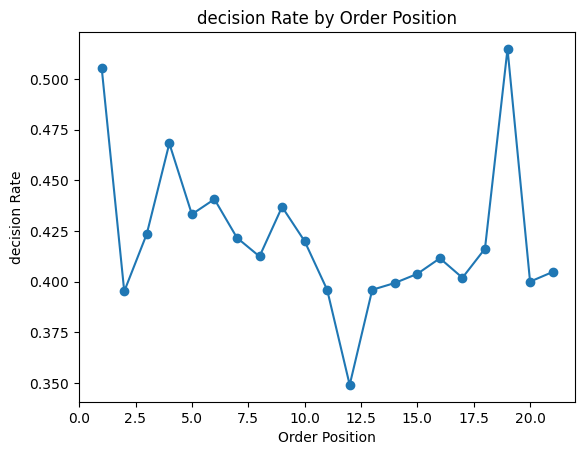

In [14]:
######### fifth question:
# -In terms of getting a second date, is it better to be someone's first speed date of the night or their last?
# graph representing the order position in relation with the match rate

# Columns for analysis
order_decision_columns = ['order', 'dec']

# Filter relevant columns
order_decision_data = data[order_decision_columns]

# Calculate the match rate for each order position
decision_rate_by_order = order_decision_data.groupby('order')['dec'].mean()

# Display results
print("decision Rate by Order Position:")
print(decision_rate_by_order)

# Visualize the match rate by order position
decision_rate_by_order.plot(kind='line', marker='o', title='decision Rate by Order Position')
plt.xlabel('Order Position')
plt.ylabel('decision Rate')
plt.show()


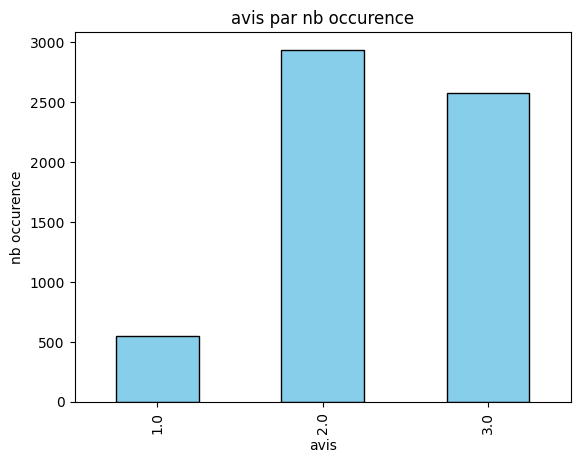

In [17]:
# Filter relevant columns
numdat_data = data[['numdat_2']]

# Count the occurrences of each value in the 'numdat_2' column
numdat_counts = numdat_data['numdat_2'].value_counts().sort_index()

# Plotting the bar plot
numdat_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('avis par nb occurence')
plt.xlabel('avis')
plt.ylabel('nb occurence')
plt.show()
